In [1]:
from datetime import timedelta
import json

In [2]:

def read_file(path):
    bench_file = open(path, "r")

    lines = bench_file.readlines()

    records = []

    for line in lines:
        records.append(json.loads(line))
    return records

In [3]:
def convert_to_delta(value):
    secs = value["secs"]
    nanos = value["nanos"]
    micros = nanos / 1000
    delta = timedelta(seconds=secs, microseconds=micros)
    return delta.total_seconds()

In [4]:
def analyze_file(path):
    records = read_file(path)
    starts = []
    totals = []
    sets = []
    get_0s = []
    get_1s = []
    get_2s = []
    dels = []

    

    for record in records:
        start = record["start"]
        start_delta = convert_to_delta(start)

        starts.append(start_delta)

        total = record["total"]
        total_delta = convert_to_delta(total)

        totals.append(total_delta)

        set_r = record["set"]
        set_delta = convert_to_delta(set_r)

        sets.append(set_delta)

        get_0 = record["get0"]
        get_0_delta = convert_to_delta(get_0)

        get_0s.append(get_0_delta)

        get_1 = record["get1"]
        get_1_delta = convert_to_delta(get_1)

        get_1s.append(get_1_delta)

        get_2 = record["get2"]
        get_2_delta = convert_to_delta(get_2)

        get_2s.append(get_2_delta)

        del_r = record["del"]
        del_delta = convert_to_delta(del_r)

        dels.append(del_delta)

    start_total = max(starts)

    new_starts = []

    for start in starts:
        part = start / start_total
        part *= len(starts)

        new_starts.append(part)
    
    return [new_starts, totals, sets, get_0s, get_1s, get_2s, dels]

In [5]:
rust_results = analyze_file("rust-bench.txt")
rust_starts = rust_results[0]
rust_totals = rust_results[1]
elixir_results = analyze_file("elixir-bench.txt")
elixir_starts = elixir_results[0]
elixir_totals = elixir_results[1]
java_results = analyze_file("java-bench.txt")
java_starts = java_results[0]
java_totals = java_results[1]
go_results = analyze_file("go-bench.txt")
go_starts = go_results[0]
go_totals = go_results[1]
ruby_yjit_results = analyze_file("ruby-yjit-bench.txt")
ruby_yjit_starts = ruby_yjit_results[0]
ruby_yjit_totals = ruby_yjit_results[1]
ruby_results = analyze_file("ruby-bench.txt")
ruby_starts = ruby_results[0]
ruby_totals = ruby_results[1]

In [6]:
def calc_mean_total(record):
    total_secods_over_all = 0
    for total in record[1]:
        total_secods_over_all += total
    
    return total_secods_over_all / len(record[1])

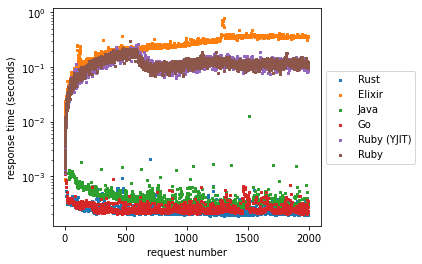

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(rust_starts, rust_totals, marker=",", s=2, label="Rust")
ax.scatter(elixir_starts, elixir_totals, marker=",", s=2, label="Elixir")
ax.scatter(java_starts, java_totals, marker=",", s=2, label="Java")
ax.scatter(go_starts, go_totals, marker=",", s=2, label="Go")
ax.scatter(ruby_yjit_starts, ruby_yjit_totals, marker=",", s=2, label="Ruby (YJIT)")
ax.scatter(ruby_starts, ruby_totals, marker=",", s=2, label="Ruby")
# ax.plot(starts, sets)
# ax.plot(starts, get_0s)
# ax.plot(starts, get_1s)
# ax.plot(starts, get_2s)
# ax.plot(starts, dels)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.set_xlabel("request number")
ax.set_ylabel("response time (seconds)")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.yscale("log")

plt.savefig("response_time.svg")
plt.show()

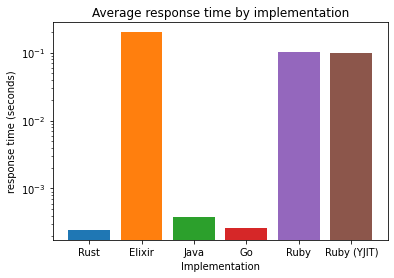

In [8]:
rust_mean = calc_mean_total(rust_results)
elixir_mean = calc_mean_total(elixir_results)
java_mean = calc_mean_total(java_results)
go_mean = calc_mean_total(go_results)
ruby_mean = calc_mean_total(ruby_results)
ruby_yjit_mean = calc_mean_total(ruby_yjit_results)

fig, ax = plt.subplots()
ax.bar("Rust", rust_mean)
ax.bar("Elixir", elixir_mean)
ax.bar("Java", java_mean)
ax.bar("Go", go_mean)
ax.bar("Ruby", ruby_mean)
ax.bar("Ruby (YJIT)", ruby_yjit_mean)

ax.set_ylabel("response time (seconds)")
ax.set_xlabel("Implementation")

plt.yscale("log")
plt.title("Average response time by implementation")
plt.savefig("average_response_time.svg")
plt.show()

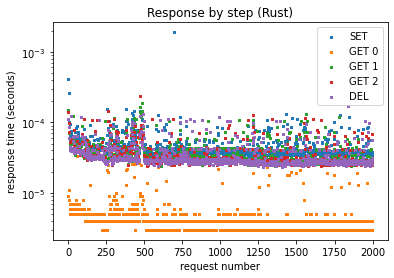

In [9]:
fig, ax = plt.subplots()

ax.scatter(rust_starts, rust_results[2], marker=",", s=2, label="SET")
ax.scatter(rust_starts, rust_results[3], marker=",", s=2, label="GET 0")
ax.scatter(rust_starts, rust_results[4], marker=",", s=2, label="GET 1")
ax.scatter(rust_starts, rust_results[5], marker=",", s=2, label="GET 2")
ax.scatter(rust_starts, rust_results[6], marker=",", s=2, label="DEL")

# ax.set_ylabel("response time (seconds)")

ax.set_ylabel("response time (seconds)")
ax.set_xlabel("request number")

plt.yscale("log")
plt.legend()
plt.title("Response by step (Rust)")
plt.savefig("response_by_step_rust.svg")
plt.show()

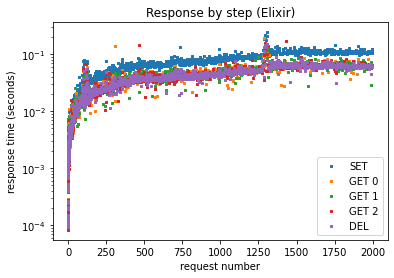

In [10]:
fig, ax = plt.subplots()

ax.scatter(elixir_starts, elixir_results[2], marker=",", s=2, label="SET")
ax.scatter(elixir_starts, elixir_results[3], marker=",", s=2, label="GET 0")
ax.scatter(elixir_starts, elixir_results[4], marker=",", s=2, label="GET 1")
ax.scatter(elixir_starts, elixir_results[5], marker=",", s=2, label="GET 2")
ax.scatter(elixir_starts, elixir_results[6], marker=",", s=2, label="DEL")

ax.set_ylabel("response time (seconds)")
ax.set_xlabel("request number")

plt.yscale("log")
plt.legend()
plt.title("Response by step (Elixir)")
plt.savefig("response_by_step_elixir.svg")
plt.show()

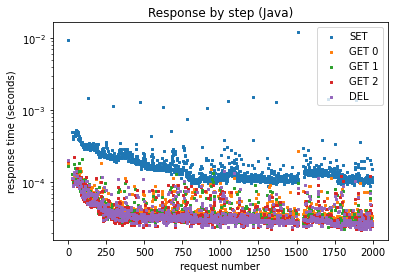

In [11]:
fig, ax = plt.subplots()

ax.scatter(java_starts, java_results[2], marker=",", s=2, label="SET")
ax.scatter(java_starts, java_results[3], marker=",", s=2, label="GET 0")
ax.scatter(java_starts, java_results[4], marker=",", s=2, label="GET 1")
ax.scatter(java_starts, java_results[5], marker=",", s=2, label="GET 2")
ax.scatter(java_starts, java_results[6], marker=",", s=2, label="DEL")

ax.set_ylabel("response time (seconds)")
ax.set_xlabel("request number")

plt.yscale("log")
plt.legend()
plt.title("Response by step (Java)")
plt.savefig("response_by_step_java.svg")
plt.show()

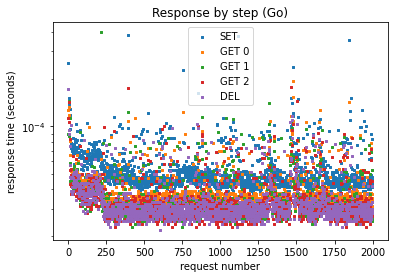

In [12]:
fig, ax = plt.subplots()

ax.scatter(go_starts, go_results[2], marker=",", s=2, label="SET")
ax.scatter(go_starts, go_results[3], marker=",", s=2, label="GET 0")
ax.scatter(go_starts, go_results[4], marker=",", s=2, label="GET 1")
ax.scatter(go_starts, go_results[5], marker=",", s=2, label="GET 2")
ax.scatter(go_starts, go_results[6], marker=",", s=2, label="DEL")

ax.set_ylabel("response time (seconds)")
ax.set_xlabel("request number")

plt.yscale("log")
plt.legend()
plt.title("Response by step (Go)")
plt.savefig("response_by_step_go.svg")
plt.show()

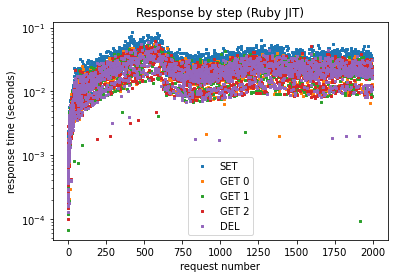

In [13]:
fig, ax = plt.subplots()

ax.scatter(ruby_yjit_starts, ruby_yjit_results[2], marker=",", s=2, label="SET")
ax.scatter(ruby_yjit_starts, ruby_yjit_results[3], marker=",", s=2, label="GET 0")
ax.scatter(ruby_yjit_starts, ruby_yjit_results[4], marker=",", s=2, label="GET 1")
ax.scatter(ruby_yjit_starts, ruby_yjit_results[5], marker=",", s=2, label="GET 2")
ax.scatter(ruby_yjit_starts, ruby_yjit_results[6], marker=",", s=2, label="DEL")

ax.set_ylabel("response time (seconds)")
ax.set_xlabel("request number")

plt.yscale("log")
plt.legend()
plt.title("Response by step (Ruby JIT)")
plt.savefig("response_by_step_ruby_jit.svg")
plt.show()

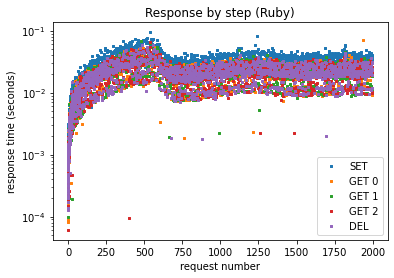

In [14]:
fig, ax = plt.subplots()

ax.scatter(ruby_starts, ruby_results[2], marker=",", s=2, label="SET")
ax.scatter(ruby_starts, ruby_results[3], marker=",", s=2, label="GET 0")
ax.scatter(ruby_starts, ruby_results[4], marker=",", s=2, label="GET 1")
ax.scatter(ruby_starts, ruby_results[5], marker=",", s=2, label="GET 2")
ax.scatter(ruby_starts, ruby_results[6], marker=",", s=2, label="DEL")

ax.set_ylabel("response time (seconds)")
ax.set_xlabel("request number")

plt.yscale("log")
plt.legend()
plt.title("Response by step (Ruby)")
plt.savefig("response_by_step_ruby.svg")
plt.show()